### Most Popular Third Party Services

The following notebook was used in the creation of the blog post "Most Popular Third Party Services" at hospitalsites.org.  It connects to Neo4j graph and parses it to extract information about external links and services that are common amongst hospital sites. 

In [62]:
import pandas as pd
import seaborn as sns
import folium
import json
from folium import plugins

In [2]:
# Neo4j library
from py2neo import Graph, Path, Node, Relationship

In [3]:
# Connect to neo4j graph
graph = Graph()

## Use Neo4J Graph to extract third-party services list


<img src="third-party-sites-graph.png" alt="Graph" style="width: 400px;"/>

### Most popular sites that are linked from a hospital site

Extract the most popular sites that hospital websites link to

In [4]:
#Get most popular services, order by one with largest number of services
cypher_query = "MATCH (site)-[:LINKS_TO]->(service) RETURN service, COLLECT(site) as sites ORDER BY SIZE(sites) DESC"
services_by_popularity = graph.run(cypher_query).data()

In [5]:
#Print the top 5 popular service and the first site that points to it
for service in services_by_popularity[0:5]:
    service_name = service['service']['name']
    sites        = service['sites']    
    print("{} - {} - {} - {}".format(service_name.ljust(15),sites[0]['name'].ljust(39), sites[0]['url'],sites[0]['beds']))

facebook.com    - Gerald Champion Regional Medical Center - www.gcrmc.org - 99.0
twitter.com     - UNITED HSPTL SYS                        - www.unitedhospitalsystem.org - 247.0
youtube.com     - St James Healthcare                     - www.stjameshealthcare.org - 58.0
google.com      - St James Healthcare                     - www.stjameshealthcare.org - 58.0
linkedin.com    - Mckenzie County Healthcare Systems      - www.mckenziehealth.com - 24.0


### Complete list of third-party sites with first 20 websites pointing to them

Write a file with the third-party site and the first 20 hospital websites pointing to it.  

In [6]:
#Write a report with service and information on first 20 sites using that service
file_report = open("most_popular_third_party_services_with_20_sites.csv","w") 

for service in services_by_popularity:
    service_name = service['service']['name']
    sites        = service['sites']
    file_report.write("-------------------"+service_name+" ("+str(len(sites))+")-------------------\n")
    for site in sites[0:20]: 
        file_report.write(site['name']+", "+site['url']+", "+str(site['beds'])+"\n")
        
file_report.close()

### Get count of websites pointing to third-party sites, order by count desc

Get total number of sites pointing ot third-party site.

In [10]:
#Get most popular services, order by one with largest number of services
services_count_by_popularity = graph.run("MATCH (site)-[:LINKS_TO]->(service) RETURN service, COUNT(site) as site_count ORDER BY COUNT(site) DESC").data()

In [ ]:
#Write a report with service and count
file_report = open("most_popular_third_party_services_by_count.csv","w") 

#Print the popular service and theit count
for service in services_count_by_popularity:
    service_name = service['service']['name']
    site_count   = service['site_count']
    print(service_name, site_count)
    file_report.write(service_name+","+str(site_count)+"\n")
file_report.close()

### Show counts and percentages of sites using third-party services

csv file created in previous step was used as a base and a service type was added manually for classification.  

In [34]:
# Read file with third-party site and category
df_services = pd.read_csv("most_popular_third_party_services_by_type.csv")

In [93]:
# Add a percentage column 
number_of_sites = 5125
df_services['percentage'] = (df_services['Count']/number_of_sites)*100

In [94]:
# Show statistics for all social media type of services
df_services[df_services['Type']=='Social Media']

,Service,Count,Type,percentage
0,facebook.com,3111,Social Media,60.702439
1,twitter.com,2251,Social Media,43.921951
2,youtube.com,1998,Social Media,38.985366
3,google.com,1384,Social Media,27.004878
4,linkedin.com,1217,Social Media,23.746341
5,instagram.com,889,Social Media,17.346341
6,pinterest.com,561,Social Media,10.946341
8,t.co,149,Social Media,2.907317
12,goo.gl,118,Social Media,2.302439
28,youtu.be,63,Social Media,1.229268


In [95]:
#Show statistics for all patient portals
df_services[df_services['Type']=='Patient Portal']

,Service,Count,Type,percentage
15,iqhealth.com,91,Patient Portal,1.775610
22,thrivepatientportal.com,71,Patient Portal,1.385366
23,followmyhealth.com,67,Patient Portal,1.307317
25,patientcompass.com,67,Patient Portal,1.307317
27,intelichart.com,64,Patient Portal,1.248780
32,mymedicalencounters.com,57,Patient Portal,1.112195
39,athenahealth.com,46,Patient Portal,0.897561
43,relayhealth.com,43,Patient Portal,0.839024
58,cernerhealth.com,34,Patient Portal,0.663415
62,healthstream.com,32,Patient Portal,0.624390


In [96]:
#Show statistics for all bill services
df_services[df_services['Type']=='Bill Payments']

,Service,Count,Type,percentage
17,billerpayments.com,84,Bill Payments,1.639024
30,datapay3.com,58,Bill Payments,1.131707
36,epayhealthcare.com,48,Bill Payments,0.936585
38,webview.com,46,Bill Payments,0.897561
48,mysecurebill.com,41,Bill Payments,0.800000
66,patientsimple.com,29,Bill Payments,0.565854
70,usbank.com,29,Bill Payments,0.565854
73,instamed.com,27,Bill Payments,0.526829
77,securebillpay.net,26,Bill Payments,0.507317
82,ixt.com,24,Bill Payments,0.468293


In [97]:
#Show statistics for all jobs
df_services[df_services['Type']=='Jobs']

,Service,Count,Type,percentage
16,healthcaresource.com,86,Jobs,1.678049
20,encompasshealth.com,78,Jobs,1.521951
21,practicewithus.com,76,Jobs,1.482927
46,trinity-health.org,41,Jobs,0.800000
51,taleo.net,39,Jobs,0.760976
64,dignityhealthcareers.org,30,Jobs,0.585366
89,icims.com,23,Jobs,0.448780
91,adp.com,23,Jobs,0.448780


In [98]:
#Show statistics for all web firm
df_services[df_services['Type']=='Web Agency']

,Service,Count,Type,percentage
10,fasthealthcorporation.com,133,Web Agency,2.595122
14,scorpionhealthcare.com,100,Web Agency,1.951220
24,in10sityhealthcare.net,67,Web Agency,1.307317
49,in10sity.net,40,Web Agency,0.780488
86,scorpion.co,24,Web Agency,0.468293


In [99]:
#Show statistics for all quick er services
df_services[df_services['Type']=='ER Check-in']

,Service,Count,Type,percentage
11,inquicker.com,122,ER Check-in,2.380488


### Show first fifty most popular third-party services

In [100]:
df_services.head(50)

,Service,Count,Type,percentage
0,facebook.com,3111,Social Media,60.702439
1,twitter.com,2251,Social Media,43.921951
2,youtube.com,1998,Social Media,38.985366
3,google.com,1384,Social Media,27.004878
4,linkedin.com,1217,Social Media,23.746341
5,instagram.com,889,Social Media,17.346341
6,pinterest.com,561,Social Media,10.946341
7,hcahealthcare.com,168,Healthcare Institution,3.278049
8,t.co,149,Social Media,2.907317
9,jointcommission.org,134,Organization,2.614634


### Clean up long tail, only keep those services that have more than 20 sites 

In [101]:
#Remove all those were count < 20 as no type was assigned
df_services = df_services[df_services['Count']>20]

In [102]:
#Show count for each type of service
df_services['Type'].value_counts()

Social Media                  14
Patient Portal                14
Bill Payments                 10
Healthcare Institution        10
Jobs                           8
Web Agency                     5
Health Content                 4
Donations                      2
Hosting                        2
Email Marketing Management     2
PDF reader                     1
Medline PLus                   1
Survey                         1
Acreditation                   1
Javascript Library hosting     1
Rankings                       1
Health Risk Assessment         1
Organization                   1
Patient Guides                 1
Medicare Forms                 1
Government                     1
Chat                           1
Emergency Management           1
Working at                     1
Remote Access                  1
Event Registration             1
Joint Commission Seal          1
Virtual Tours                  1
Social Support                 1
Content Management             1
ER Check-i

### Show counts of services by type 

In [103]:
#Show number of sites that point to each type of service, sort by sites linking to service
df_agg = df_services.groupby('Type')['Count'].agg(['sum','count']).sort_values(by=['sum'], ascending=False)
df_agg.columns=['Links Pointing to Service','Number of Unique Services']

In [104]:
#Add a percentage column
df_agg['Percentage of sites']=(df_agg['Links Pointing to Service']/ df_agg['Links Pointing to Service'].sum())*100

In [105]:
df_agg

,Links Pointing to Service,Number of Unique Services,Percentage of sites
Type,,,
Social Media,11897,14,74.979517
Patient Portal,669,14,4.216298
Healthcare Institution,492,10,3.100775
Bill Payments,412,10,2.596584
Jobs,396,8,2.495746
Web Agency,364,5,2.294069
Health Content,221,4,1.392828
Organization,134,1,0.844520
ER Check-in,122,1,0.768891


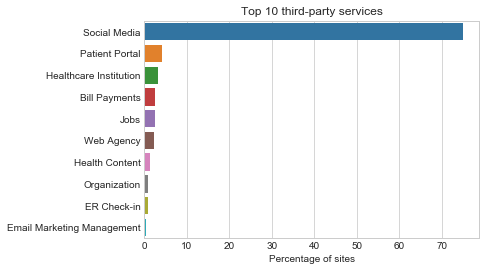

In [106]:
# Make a graph of the top 10 services
sns.set_style("whitegrid")
ax = sns.barplot(x="Percentage of sites", y=list(df_agg.index[:10]), data=df_agg[:10]).set_title('Top 10 third-party services')

### Show counts of service type excluding than Social Media

In [111]:
# Readjust percentage column
df_agg_no_social['Percentage of sites']=(df_agg_no_social['Links Pointing to Service']/ df_agg_no_social['Links Pointing to Service'].sum())*100

In [112]:
df_agg_no_social

,Links Pointing to Service,Number of Unique Services,Percentage of sites
Type,,,
Patient Portal,669,14,16.851385
Healthcare Institution,492,10,12.392947
Bill Payments,412,10,10.377834
Jobs,396,8,9.974811
Web Agency,364,5,9.168766
Health Content,221,4,5.566751
Organization,134,1,3.375315
ER Check-in,122,1,3.073048
Email Marketing Management,81,2,2.040302


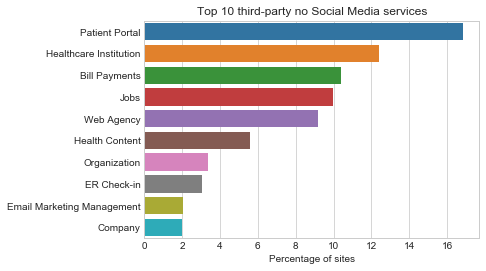

In [113]:
#Make a graph of the top 10 serviecs
sns.set_style("whitegrid")
ax = sns.barplot(x="Percentage of sites", y=list(df_agg_no_social.index[:10]), data=df_agg_no_social[:10]).set_title('Top 10 third-party no Social Media services')

## Use Cypher to extract information from Graph

<img src="third-party-sites-graph-with-servicetype.png" alt="Graph" style="width: 400px;"/>

#### Social Media Services

In [6]:
#List social media services and number of sites pointing to them
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)-[:IS_OF_TYPE]->(servicetype:ServiceType)
WHERE servicetype.name="Social Media"
RETURN service.name,  COUNT(site) as number_of_sites
ORDER BY number_of_sites DESC
"""
social_media_services = graph.run(cypher_query).data()

In [7]:
#Print Social Media services and number of sites pointing to them
for service in social_media_services:
    print("{} - {}".format(service['service.name'].ljust(20),service['number_of_sites']))

facebook.com         - 3111
twitter.com          - 2251
youtube.com          - 1998
google.com           - 1384
linkedin.com         - 1217
instagram.com        - 889
pinterest.com        - 561
t.co                 - 149
goo.gl               - 118
youtu.be             - 63
bit.ly               - 46
vimeo.com            - 45
flickr.com           - 43
addthis.com          - 22
snapchat.com         - 20
wpengine.com         - 20


#### Patient Portal

In [8]:
#List patient portal and number of sites pointing to them
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)-[:IS_OF_TYPE]->(servicetype:ServiceType)
    WHERE servicetype.name="Patient Portal"
    RETURN service.name,  COUNT(site) as number_of_sites
    ORDER BY number_of_sites DESC
    """
patient_portal_services = graph.run(cypher_query).data()

In [9]:
#Print Patient Portal services and number of sites pointing to them
for service in patient_portal_services:
     print("{} - {}".format(service['service.name'].ljust(25),service['number_of_sites']))

iqhealth.com              - 91
thrivepatientportal.com   - 71
followmyhealth.com        - 67
patientcompass.com        - 67
intelichart.com           - 64
mymedicalencounters.com   - 57
athenahealth.com          - 46
relayhealth.com           - 43
cernerhealth.com          - 34
healthstream.com          - 32
patientportal.me          - 27
nextmd.com                - 25
yourcarecommunity.com     - 24
myunitypoint.org          - 21
mysanfordchart.org        - 20
clockwisemd.com           - 19


#### Bill Payments

In [10]:
#List bill payments and number of sites pointing to them
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)-[:IS_OF_TYPE]->(servicetype:ServiceType)
WHERE servicetype.name="Bill Payments"
RETURN service.name,  COUNT(site) as number_of_sites
ORDER BY number_of_sites DESC
"""
bill_payments_services = graph.run(cypher_query).data()

In [11]:
#Print Patient Portal services and number of sites pointing to them
for service in bill_payments_services:
    print("{} - {}".format(service['service.name'].ljust(25),service['number_of_sites']))

billerpayments.com        - 84
datapay3.com              - 58
epayhealthcare.com        - 48
webview.com               - 46
mysecurebill.com          - 41
patientsimple.com         - 29
usbank.com                - 29
instamed.com              - 27
securebillpay.net         - 26
ixt.com                   - 24
ipayxepay.net             - 17


## List sites that use specific services

Below is a small subset of well-known services and the sites that use them.

### Kyruus

In [35]:
#List sites using Kyruus, a matchmaking sytem used by hospitals
#Include state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "kyruus.com"
RETURN site.name, site.url, state.name, site.latitude, site.longitude
ORDER BY state.name
"""
sites_using_kyruus = graph.run(cypher_query).data()

In [36]:
#Print sites using service
for site in sites_using_kyruus:
    print("{} - {} - {}".format(site['state.name'],site['site.name'].ljust(45),site['site.url']))

FL - University of Miami Hospital                  - www.umiamihospital.com
FL - University of Miami Hospital and Clinics      - www.uhealthsystem.com
FL - Anne Bates Leach Eye Hospital                 - www.bascompalmer.org
GA - Piedmont Hospital                             - www.piedmonthospital.org
GA - Piedmont Fayette Community Hospital           - www.fayettehospital.org
GA - Clearview Regional Medical Center             - www.clearviewregionalmedicalcenter.com
GA - Newton General Hospital                       - www.newtonmedical.com
GA - Piedmont Newnan Hospital                      - www.piedmont.org
GA - Rockdale Hospital and Health System           - www.rockdalemedicalcenter.org
IN - Community Hospital Of Anderson And Madison County - www.communityanderson.com
MA - Baystate Franklin Medical Center              - www.baystatehealth.com
MA - Baystate Medical Center                       - www.baystatehealth.org
OH - Akron City Hospitals                          - www.summahea

In [39]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_kyruus]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

### CarePages

In [42]:
#List sites using CarePages, a site for patient support
#Include state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "carepages.com"
RETURN site.name, site.url, state.name, site.latitude, site.longitude
ORDER BY state.name
"""
sites_using_carepages = graph.run(cypher_query).data()

In [43]:
# Print sites using service
# NOTE: CarePages is a service that no longer exists, this shows sites that may not be aware
# of that. 
for site in sites_using_carepages:
    print("{} - {} - {}".format(site['state.name'],site['site.name'].ljust(40),site['site.url']))

CO - Craig Hospital                           - www.craighospital.org
FL - All Children's Hospital                  - www.allkids.org
LA - East Jefferson General Hospital          - www.ejgh.org
MI - North Ottawa Community Hospital          - www.noch.org
NM - University of New Mexico Hospital        - hospitals.unm.edu
OH - Evendale Medical Center                  - www.evendalemedical.com
OH - Good Samaritan Hospital                  - www.trihealth.com
OH - Mccullough-Hyde Memorial Hospital        - www.mhmh.org
PA - Lehigh Valley Hospital                   - www.lvhn.org
WI - St. Elizabeth Hospital                   - www.affinityhealth.org


In [44]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_carepages]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

### CaringBridge

In [46]:
#List sites using CaringBridge, a site for patient support 
#Include state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "caringbridge.org"
RETURN site.name, site.url, state.name, site.longitude, site.latitude 
ORDER BY state.name
"""
sites_using_caringbridge = graph.run(cypher_query).data()

In [47]:
# Print sites using service
for site in sites_using_caringbridge:
    print("{} - {} - {}".format(site['state.name'],site['site.name'].ljust(40),site['site.url']))

CA - Citrus Valley Medical Center - Qv Campus - www.cvhp.org
FL - Sacred Heart Hospital                    - www.sacred-heart.org
FL - All Children's Hospital                  - www.allkids.org
FL - Tallahassee Memorial Hospital            - www.tmh.org
FL - Englewood Community Hospital             - www.englewoodcommunityhospital.com
IA - Mitchell County Memorial Hospital        - www.mitchellcohospital-clinics.com
IA - Hancock County Memorial Hospital         - www.trusthchs.com
IA - Baum-Harmon Memorial Hospital            - www.baumharmon.org
IA - North Iowa Mercy Health Center           - www.mercynorthiowa.com
IA - Kossuth County Hospital                  - www.krhc.com
IA - Franklin General Hospital                - www.franklingeneral.com
IA - Marian Health Center                     - www.mercysiouxcity.com
IA - Regional Health Services of Howard County - www.rhshc.com
IA - Palo Alto County Hospital                - www.pachs.com
IA - Mercy Medical Center-New Hampton         -

In [48]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_caringbridge]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

### ConstantContact

In [49]:
#List sites using CostantContact, a site for email newsletter management
#Include beds, state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "constantcontact.com"
RETURN site.beds, site.name, site.url, state.name, site.longitude, site.latitude
ORDER BY site.beds DESC
"""
sites_using_constantcontact = graph.run(cypher_query).data()

In [50]:
# Print sites using service
for site in sites_using_constantcontact:
    print("{} - {} - {} - {}".format(site['site.beds'], site['state.name'],site['site.name'].ljust(35),site['site.url']))

771.0 - NY - Kingsbrook Jewish Medical Center    - www.kingsbrook.org
392.0 - CA - University Of Calif-San Diego Medical Center - health.ucsd.edu
391.0 - VA - Bon Secours St. Marys Hospital      - richmond.bonsecours.com
332.0 - CT - Hospital at Hebrew Health Care      - www.hebrewhealthcare.org
288.0 - NY - Niagara Falls Memorial Medical Center - www.nfmmc.org
272.0 - IA - Mercy Health Center St. Joseph'S Unit - www.mercydubuque.com
272.0 - FL - Miami Children's Hospital           - www.mch.com
270.0 - AZ - Northwest Med Center                - www.northwestmedicalcenter.com
260.0 - IL - St Elizabeth Hospital               - www.steliz.org
252.0 - TX - Laurel Ridge Treatment Center       - www.laurelridgetc.com
245.0 - NY - WCA Hospital                        - www.wcahospital.org
242.0 - NY - St. Luke's Cornwall Hospital - Newburgh Campus - www.stlukescornwallhospital.org
241.0 - NY - St. John's Episcopal Hospital-South Shore - www.ehs.org
230.0 - LA - Terrebonne General Medical Cent

In [51]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_constantcontact]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

### ZocDoc

In [52]:
#List sites using ZocDoc, a site for appointment requests
#Include beds, state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "zocdoc.com"
RETURN site.beds, site.name, site.url, state.name, site.longitude, site.latitude
ORDER BY site.beds DESC
"""
sites_using_zocdoc = graph.run(cypher_query).data()

In [53]:
# Print sites using service
for site in sites_using_zocdoc:
    print("{} - {} - {} - {}".format(site['site.beds'], site['state.name'],site['site.name'].ljust(35),site['site.url']))

1321.0 - TN - Methodist University Hospital       - www.methodisthealth.org
1317.0 - IN - Indiana University Health           - www.iuhealth.org
577.0 - IL - The University Of Chicago Medical Center - www.uchospitals.edu
560.0 - TN - Erlanger Medical Center             - www.erlanger.org
491.0 - OH - University Hospitals Conneaut Medical Center - www.uhhospitals.org
463.0 - AZ - St. Joseph'S                        - www.carondelet.org
451.0 - NJ - Valley Hospital                     - www.valleyhealth.com
448.0 - MO - Missouri Baptist Medical Center     - www.missouribaptistmedicalcenter.org
428.0 - OH - Akron City Hospitals                - www.summahealth.org
421.0 - IL - Mercy Hospital And Medical Center   - www.mercy-chicago.org
400.0 - CA - Fountain Valley Rgnl Hosp And Med Ctr - Euclid - www.fountainvalleyhospital.com
376.0 - NJ - Christ Hospital                     - www.christhospital.org
365.0 - TN - Regional Medical Center At Memphis  - www.the-med.org
350.0 - MI - Mclaren Fl

In [55]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_zocdoc]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

### ADAM

In [57]:
#List sites using ADAM, a health encyclopedia
#Include beds, state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "adam.com"
RETURN site.beds, site.name, site.url, state.name, site.latitude, site.longitude
ORDER BY site.beds DESC
"""
sites_using_adam = graph.run(cypher_query).data()

In [58]:
# Print sites using service (35 sites)
for site in sites_using_adam:
    print("{} - {} - {} - {}".format(site['site.beds'], site['state.name'],site['site.name'].ljust(35),site['site.url']))

722.0 - MS - University Hospital And Clinics - The University of Mississippi Medical Center - www.umc.edu
555.0 - MI - Oakwood Hospital And Medical Center - www.oakwood.org
522.0 - TX - Hendrick Medical Center             - www.ehendrick.org
504.0 - OH - Good Samaritan Hospital             - www.trihealth.com
501.0 - NY - Buffalo General Medical Center      - www.kaleidahealth.org
484.0 - PA - Penn State Milton S Hershey Medical Center - www.pennstatehershey.org
447.0 - KY - Owensboro Health Regional Hospital  - www.owensborohealth.org
431.0 - NY - St Joseph's Hospital Health Center  - www.sjhsyr.org
422.0 - MT - Benefis Health Care (East Campus)   - www.benefis.org
386.0 - IL - Northwest Community Hospital        - www.nch.org
371.0 - IL - Macneal  Hospital                   - www.macneal.com
357.0 - OK - Comanche County Memorial Hospital   - www.ccmhonline.com
308.0 - KY - Hazard Arh Regional Medical Center  - www.arh.org
240.0 - PA - Chambersburg Hospital               - www.summith

In [67]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_adam]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

### Staywell

In [60]:
#List sites using Staywell, a health encyclopedia
#Include beds, state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "staywellsolutionsonline.com"
RETURN site.beds, site.name, site.url, state.name, site.latitude, site.longitude
ORDER BY site.beds DESC
"""
sites_using_staywell = graph.run(cypher_query).data()

In [61]:
# Print sites using service (100 sites)
for site in sites_using_staywell:
    print("{} - {} - {} - {}".format(site['site.beds'], site['state.name'],site['site.name'].ljust(35),site['site.url']))

950.0 - GA - Grady Memorial Hospital             - www.gradyhealthsystem.org
748.0 - WA - Swedish Medical Center - First Hill Campus - www.swedish.org
684.0 - IL - Advocate Christ Hospital & Medical Center - www.advocatehealth.com
672.0 - FL - Baptist Hospital of Miami           - www.baptisthealth.net
604.0 - SC - Musc Medical Center                 - www.muschealth.com
564.0 - TX - Texas Children's Hospital           - www.texaschildrenshospital.org
547.0 - OH - Aultman Hospital                    - www.aultman.com
543.0 - CO - Memorial Hospital Central           - www.memorialhealthsystem.com
528.0 - OR - Providence St Vincent Medical Center - www.providence.org
514.0 - TN - Johnson City Medical Center         - www.msha.com
498.0 - OH - University Hospital, Inc            - universityhospital.uchealth.com
496.0 - PA - Hahnemann University Hospital       - www.hahnemannhospital.com
495.0 - MI - St John Macomb-Oakland Hospital-Macomb Center - www.stjohnprovidence.org
484.0 - SC - Spa

In [64]:
# Create map 
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_staywell]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m

In [27]:
#List sites using Staywell, a health encyclopedia
#Include beds, state, hospital and hospital url
cypher_query = """MATCH (site:Site)-[:LINKS_TO]->(service:Service)
MATCH (state:State)<-[:IS_IN_STATE]-(site:Site)
WHERE service.name = "staywellsolutionsonline.com"
RETURN site.beds, site.name, site.url, state.name, site.latitude, site.longitude
ORDER BY site.beds DESC
"""
sites_using_staywell = graph.run(cypher_query).data()

In [33]:
# Map locations of hospitals in US Map
data = [[site['site.latitude'],site['site.longitude']] for site in sites_using_staywell]
m = folium.Map([43, -100], zoom_start=4)
plugins.MarkerCluster(data).add_to(m)
#Display map
m